In [1]:
import cv2
import matplotlib.pyplot as plt
import shi_tomasi_sift as sts
import numpy as np
import ipywidgets as widgets

## Extraction of image area

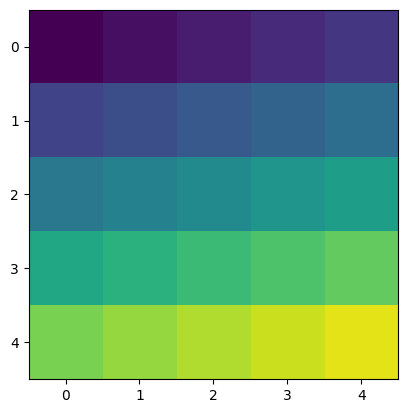

In [2]:
test_sample = np.arange(0, 25)
test_sample = np.reshape(test_sample, (5,5))
plt.imshow(test_sample, vmin = 0, vmax = 25)

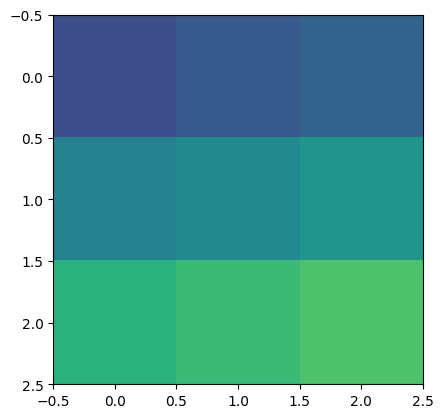

In [3]:
extracted_region = sts.extract_area(test_sample, (2,2), 3)
plt.imshow(extracted_region, vmin = 0, vmax = 25)

### Border handling

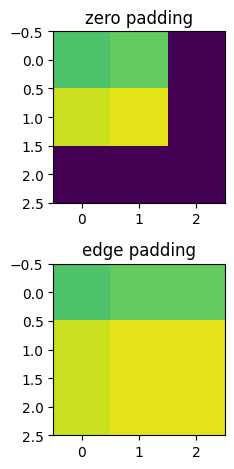

In [4]:
extracted_region_zero = sts.extract_area(test_sample, (4,4), 3, border_handling="zero")
extracted_region_edge = sts.extract_area(test_sample, (4,4), 3, border_handling="edge")

fig, ax = plt.subplots(2,1)
ax[0].imshow(extracted_region_zero, vmin = 0, vmax = 25)
ax[0].set_title("zero padding")
ax[1].imshow(extracted_region_edge, vmin = 0, vmax = 25)
ax[1].set_title("edge padding")
plt.tight_layout()

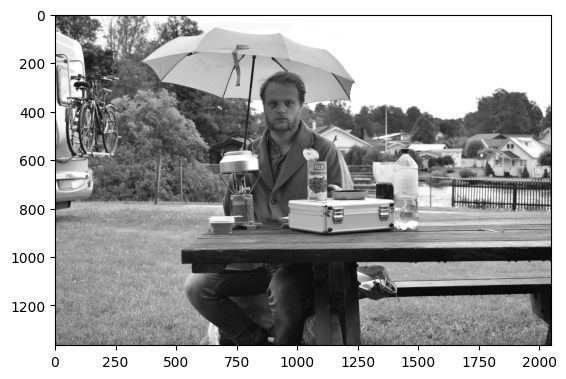

In [5]:
img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
sts.plot_image(None, img)

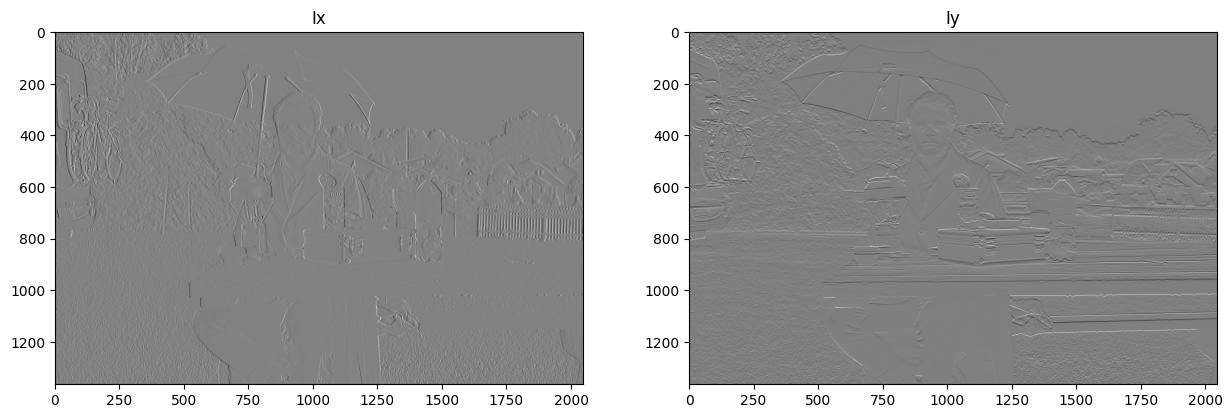

In [6]:
shi_tomasi_sift = sts.ShiTomasiSift(create_new_keypoint_for_large_angle_histogram_values=True)
Ix, Iy = shi_tomasi_sift._calculate_Ix_and_Iy(img)

fig, ax = plt.subplots(1,2, figsize = (15, 15))

sts.plot_image(ax[0], Ix, plot_title="Ix")
sts.plot_image(ax[1], Iy, plot_title="Iy")

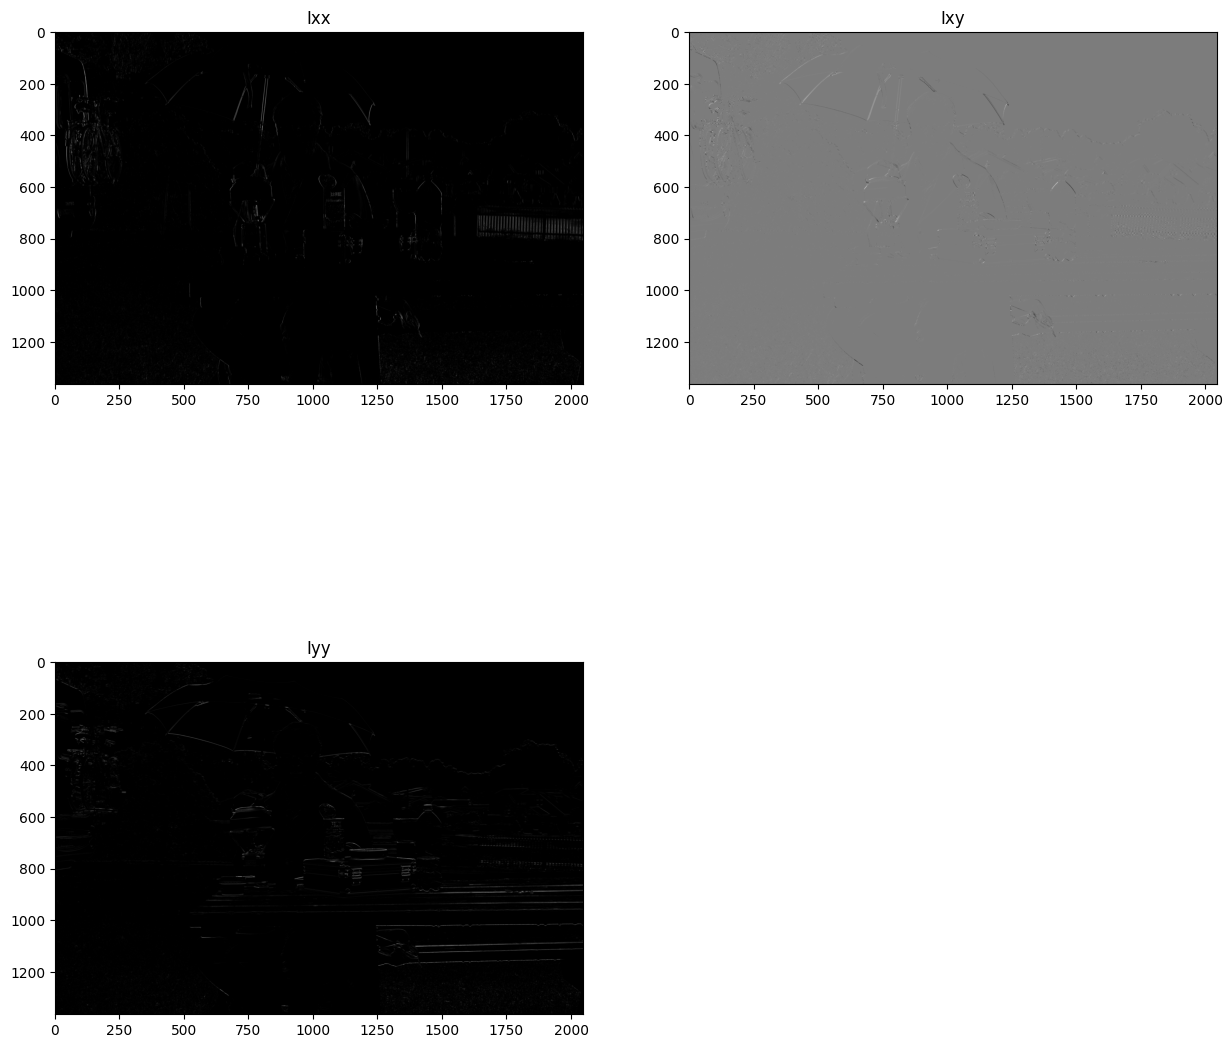

In [7]:
Ixx, Ixy, Iyy = shi_tomasi_sift._calculate_Ixx_Ixy_and_Iyy(Ix, Iy)
fig, ax = plt.subplots(2,2, figsize = (15, 15))

sts.plot_image(ax[0][0], Ixx, plot_title="Ixx")
sts.plot_image(ax[0][1], Ixy, plot_title="Ixy")
sts.plot_image(ax[1][0], Iyy, plot_title="Iyy")
fig.delaxes(ax[1][1])

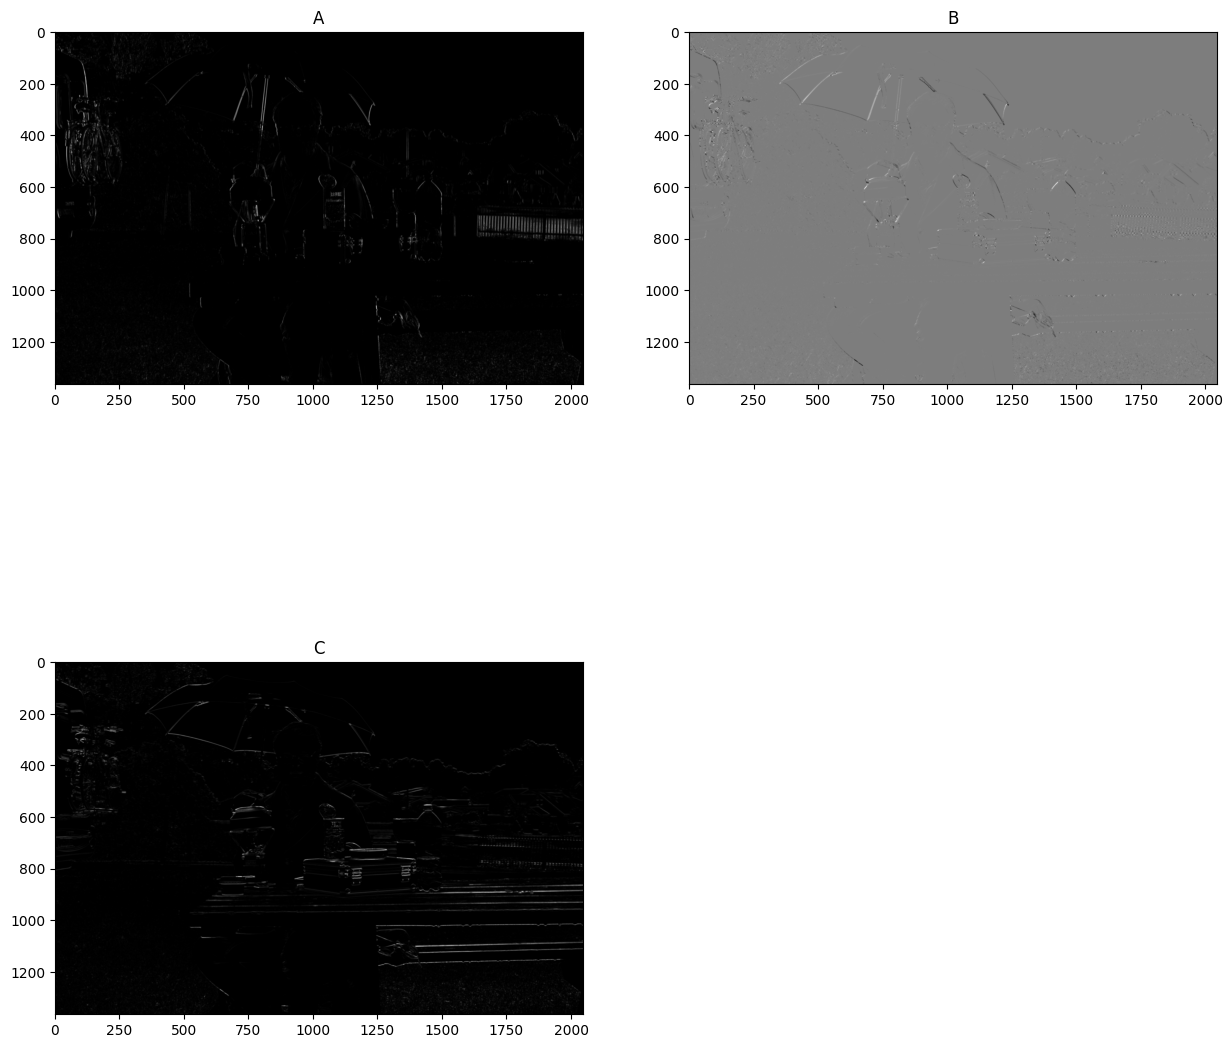

In [8]:
A, B, C = shi_tomasi_sift._calculate_structure_tensors(Ix, Iy)
fig, ax = plt.subplots(2,2, figsize = (15, 15))

sts.plot_image(ax[0][0], A, plot_title="A")
sts.plot_image(ax[0][1], B, plot_title="B")
sts.plot_image(ax[1][0], C, plot_title="C")
fig.delaxes(ax[1][1])

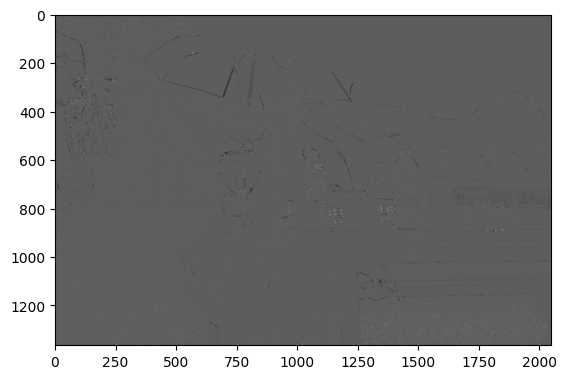

In [9]:
response = shi_tomasi_sift._calculate_response(Ix, Iy)
sts.plot_image(None, response)

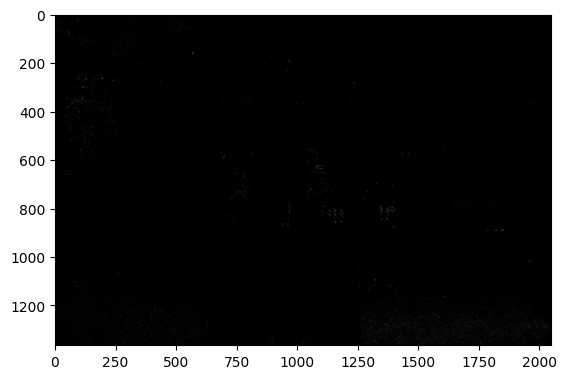

In [10]:
response = shi_tomasi_sift._threshold_response(response)
sts.plot_image(None, response)

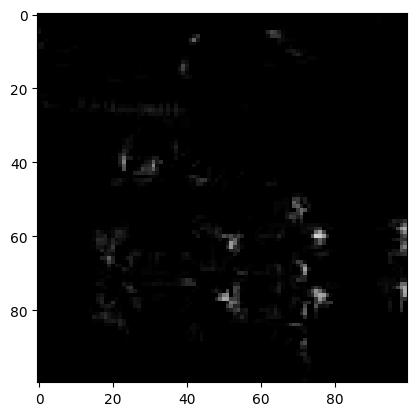

In [11]:
sts.plot_image(None, response, (1130, 800), 100)

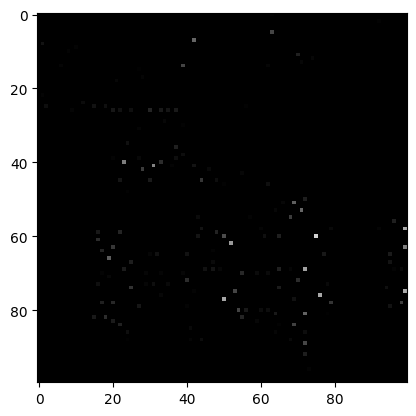

In [12]:
response = shi_tomasi_sift._perform_non_maxmum_supression(response)
positions = shi_tomasi_sift._get_keypoint_positions(response)
sts.plot_image(None, response, (1130, 800), 100)

3.0


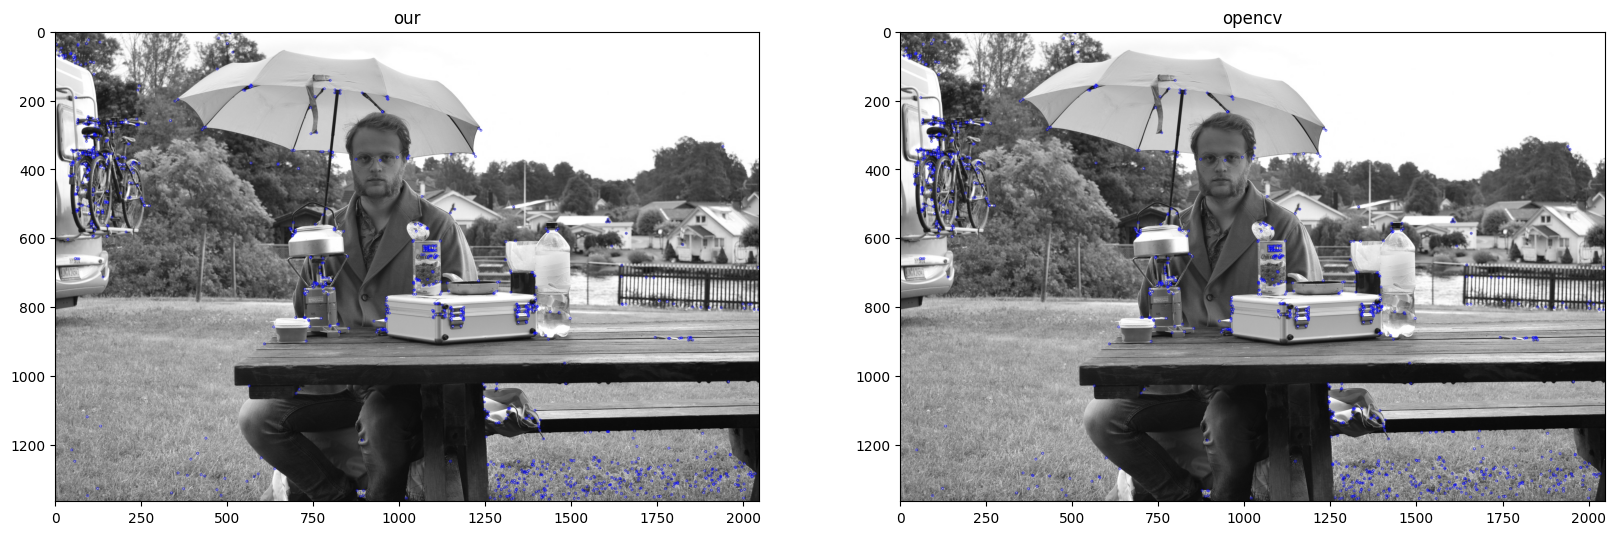

In [13]:
our_kps = shi_tomasi_sift.detect(img)
our_output_image = cv2.drawKeypoints(img, our_kps, 0, (0, 0, 255),
                                 flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

print(our_kps[0].size)

opencv_shi_tomasi = cv2.GFTTDetector_create()
opencv_kps = opencv_shi_tomasi.detect(img)
opencv_output_image = cv2.drawKeypoints(img, opencv_kps, 0, (0, 0, 255),
                                 flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(1,2, figsize = (20, 20))
sts.plot_image(ax[0], our_output_image, plot_title="our")
sts.plot_image(ax[1], opencv_output_image, plot_title="opencv")

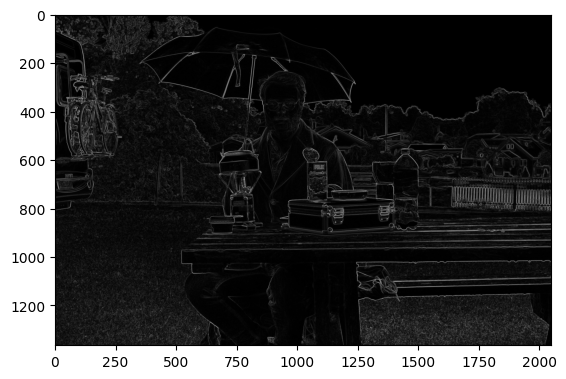

In [14]:
magnitude, angle = shi_tomasi_sift._calculate_magnitude_and_angle(Ix, Iy)
sts.plot_image(None, magnitude)

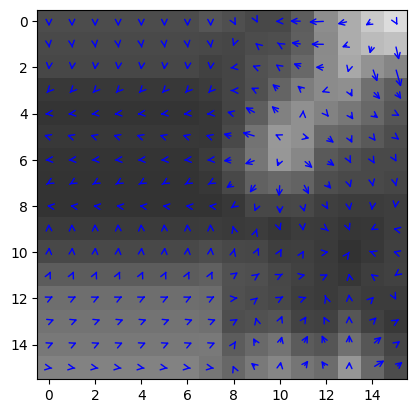

In [15]:
center = positions[11]

sts.plot_magnitude_and_angle(None, img, magnitude, angle, center, 16, border_handling="edge")

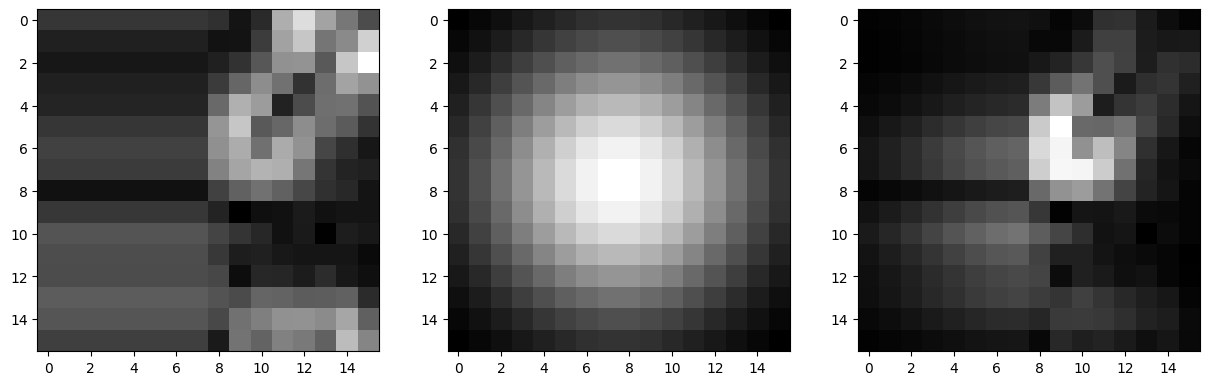

In [16]:
keypoint_area = sts.extract_area(img, center, 16, border_handling = "edge")
keypoint_area_angle = sts.extract_area(angle, center, 16, border_handling = "edge")
keypoint_area_magnitude = sts.extract_area(magnitude, center, 16, border_handling = "edge")

gaussian_weight = sts.weight_area_with_gaussian_window(np.ones_like(keypoint_area_magnitude), 4.5)
keypoint_area_magnitude_weighted_for_orientation = sts.weight_area_with_gaussian_window(keypoint_area_magnitude, 4.5)

fig, ax = plt.subplots(1,3, figsize = (15, 15))
sts.plot_image(ax[0], keypoint_area_magnitude)
sts.plot_image(ax[1], gaussian_weight)
sts.plot_image(ax[2], keypoint_area_magnitude_weighted_for_orientation)

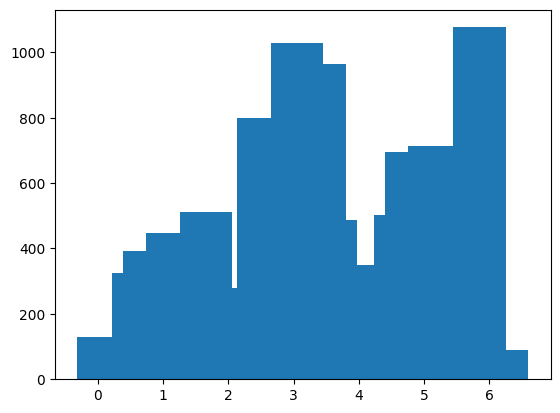

In [17]:
orientation_bins, orientaiton_histogram = shi_tomasi_sift._calculate_histogram(keypoint_area_angle,
                                                                            keypoint_area_magnitude_weighted_for_orientation,
                                                                            36,
                                                                            0,
                                                                            2 * np.pi)

sts.plot_histogram(None, orientaiton_histogram, orientation_bins)

3.0712909666979344


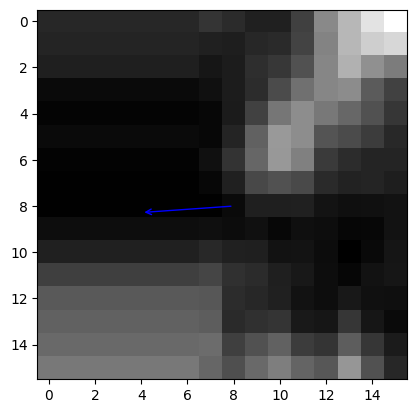

In [18]:
keypoint_angle = shi_tomasi_sift._get_angles_from_histogram(orientaiton_histogram, orientation_bins)[0]
print(keypoint_angle)
sts.plot_area_and_arrow_with_angle(None, keypoint_area, keypoint_angle)

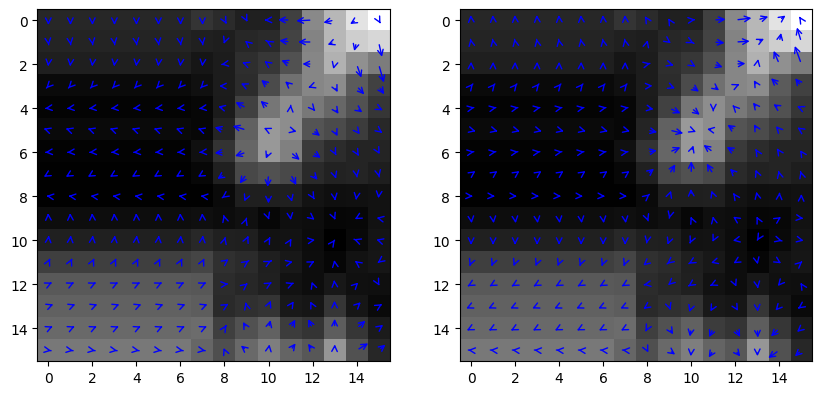

In [19]:
rotated_keypoint_area_angles = keypoint_area_angle + keypoint_angle
fig, ax = plt.subplots(1,2, figsize = (10, 10))
sts.plot_magnitude_and_angle(ax[0], keypoint_area, keypoint_area_magnitude, keypoint_area_angle)
sts.plot_magnitude_and_angle(ax[1], keypoint_area, keypoint_area_magnitude, rotated_keypoint_area_angles)

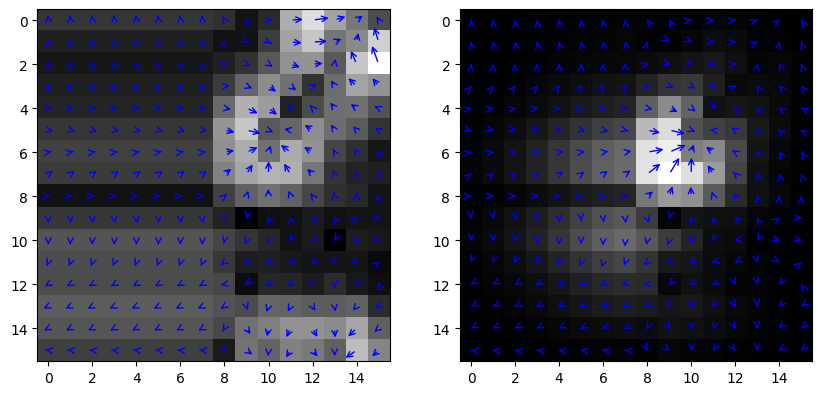

In [20]:
keypoint_area_magnitude_weighted_for_description = sts.weight_area_with_gaussian_window(keypoint_area_magnitude, 3)
fig, ax = plt.subplots(1,2, figsize = (10, 10))
sts.plot_magnitude_and_angle(ax[0], keypoint_area_magnitude, keypoint_area_magnitude, rotated_keypoint_area_angles)
sts.plot_magnitude_and_angle(ax[1], keypoint_area_magnitude_weighted_for_description, keypoint_area_magnitude_weighted_for_description, rotated_keypoint_area_angles)

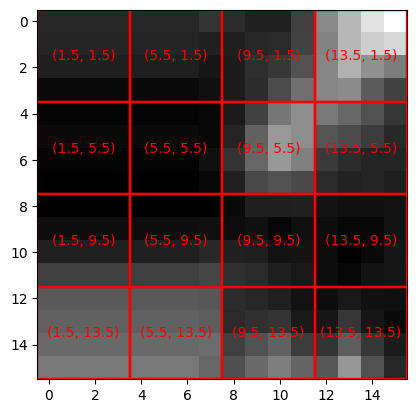

In [21]:
subwindow_positions = shi_tomasi_sift._calculate_descriptor_subwindow_center_positions()
sts.plot_subwindow_positions(None, keypoint_area, subwindow_positions)

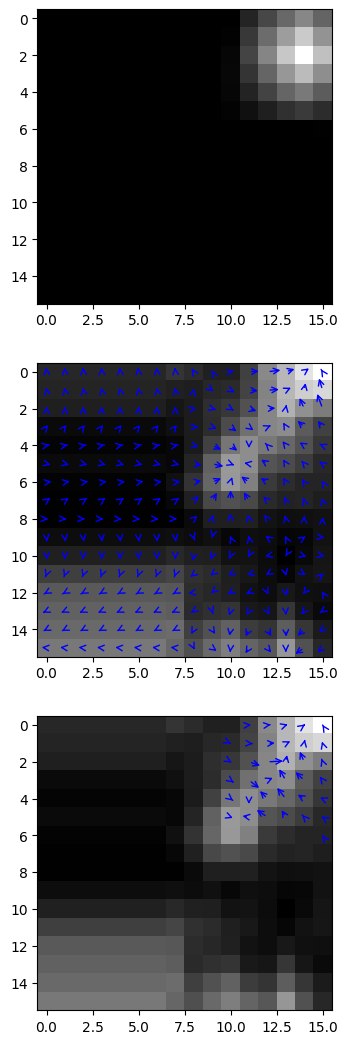

In [22]:
rotated_coordinates = shi_tomasi_sift._rotate_coordinates_around_center(keypoint_area_angle, keypoint_angle)
positional_weights = shi_tomasi_sift._calculate_positional_weights_with_respect_to_subwindows(rotated_coordinates, subwindow_positions)
fig, ax = plt.subplots(3, 1, figsize =(13, 13))
sts.plot_image(ax[0], positional_weights[3, 0])
sts.plot_magnitude_and_angle(ax[1], keypoint_area, keypoint_area_magnitude, rotated_keypoint_area_angles)

total_weights_subwindow = positional_weights[3, 0] * keypoint_area_magnitude_weighted_for_description

sts.plot_magnitude_and_angle(ax[2], keypoint_area, total_weights_subwindow, rotated_keypoint_area_angles)

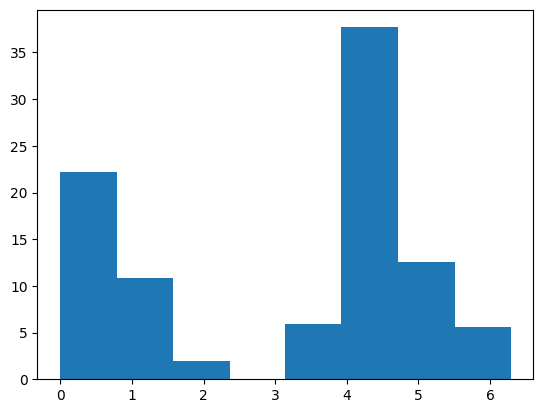

In [23]:
subwindow_bins, subwindow_histogram = shi_tomasi_sift._calculate_histogram(rotated_keypoint_area_angles,
                                                       total_weights_subwindow,
                                                       8,
                                                       0,
                                                       2 * np.pi,
                                                       True
                                                      )

sts.plot_histogram(None, subwindow_histogram, subwindow_bins)

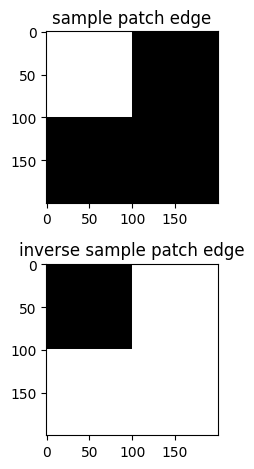

In [24]:
sample_patch_edge = np.ones(shape=(100, 100), dtype = np.float32) * 255
sample_patch_edge = np.pad(sample_patch_edge, ((0, 100), (0 ,100)))

inverse_sample_patch_edge = np.zeros(shape=(100, 100), dtype = np.float32)
inverse_sample_patch_edge = np.pad(inverse_sample_patch_edge, ((0, 100), (0 ,100)), constant_values = 255)


fig, ax = plt.subplots(2, 1)

sts.plot_image(ax[0], sample_patch_edge, plot_title="sample patch edge")
sts.plot_image(ax[1], inverse_sample_patch_edge, plot_title="inverse sample patch edge")

plt.tight_layout()

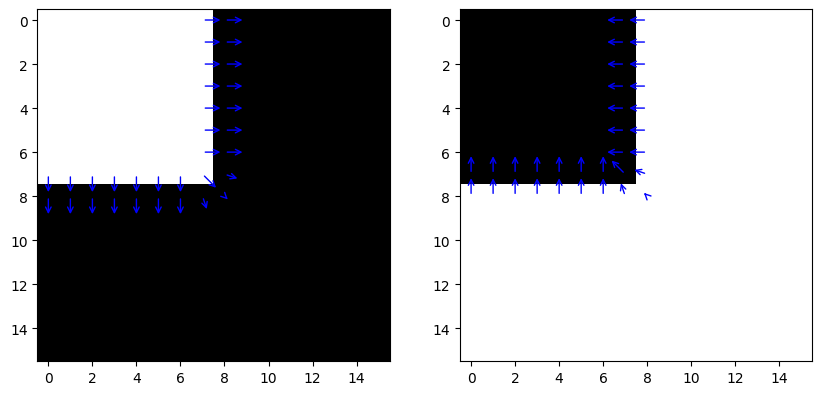

In [25]:
sample_patch_edge_Ix, sample_patch_edge_Iy = shi_tomasi_sift._calculate_Ix_and_Iy(sample_patch_edge)
inverse_sample_patch_edge_Ix, inverse_sample_patch_edge_Iy = shi_tomasi_sift._calculate_Ix_and_Iy(inverse_sample_patch_edge)

sample_patch_edge_magnitude, sample_patch_edge_angle = shi_tomasi_sift._calculate_magnitude_and_angle(sample_patch_edge_Ix, sample_patch_edge_Iy)
inverse_sample_patch_edge_magnitude, inverse_sample_patch_edge_angle = shi_tomasi_sift._calculate_magnitude_and_angle(inverse_sample_patch_edge_Ix, inverse_sample_patch_edge_Iy)

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

sts.plot_magnitude_and_angle(ax[0], sample_patch_edge, sample_patch_edge_magnitude, sample_patch_edge_angle, (100, 100), 16)
sts.plot_magnitude_and_angle(ax[1], inverse_sample_patch_edge, inverse_sample_patch_edge_magnitude, inverse_sample_patch_edge_angle, (100, 100), 16)

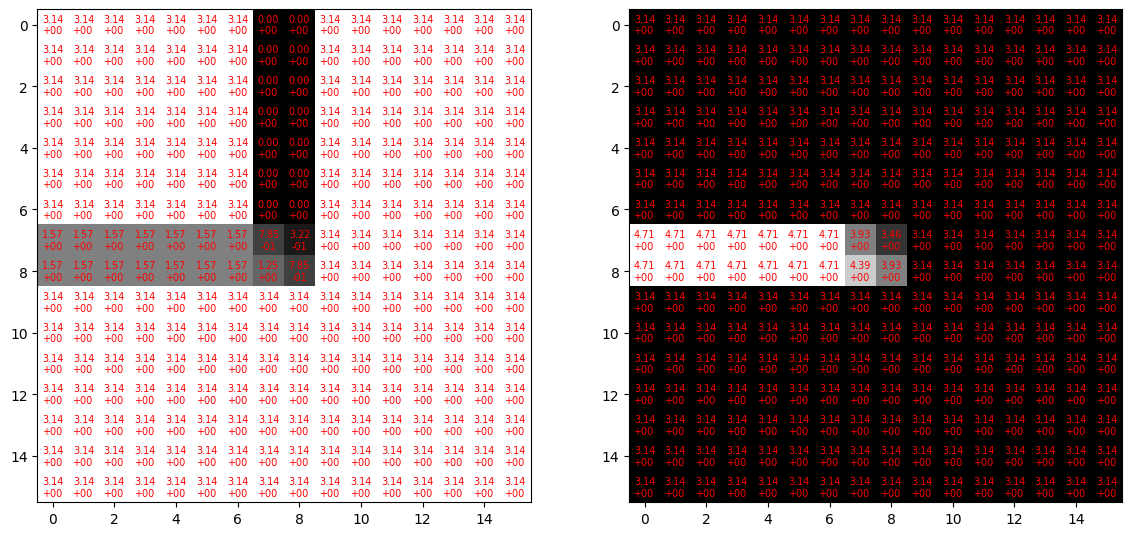

In [26]:
fig, ax = plt.subplots(1,2, figsize = (14, 14))

sts.plot_image(ax[0], sample_patch_edge_angle, (100, 100), 16, show_values = True)
sts.plot_image(ax[1], inverse_sample_patch_edge_angle, (100, 100), 16, show_values = True)

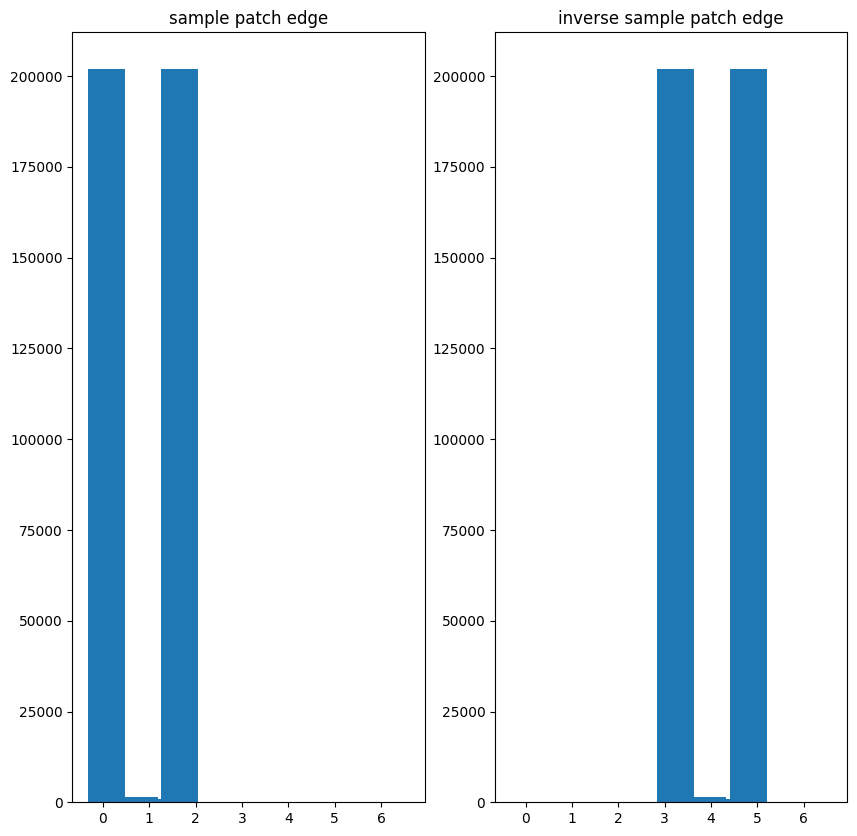

In [27]:
sample_patch_edge_bins, sample_patch_edge_hist = shi_tomasi_sift._calculate_histogram(sample_patch_edge_angle, sample_patch_edge_magnitude, 36, 0, 2*np.pi)
inverse_sample_patch_edge_bins, inverse_sample_patch_edge_hist = shi_tomasi_sift._calculate_histogram(inverse_sample_patch_edge_angle, inverse_sample_patch_edge_magnitude, 36, 0, 2*np.pi)

fig, ax = plt.subplots(1, 2, figsize =(10, 10))
sts.plot_histogram(ax[0], sample_patch_edge_hist, sample_patch_edge_bins, "sample patch edge")
sts.plot_histogram(ax[1], inverse_sample_patch_edge_hist, inverse_sample_patch_edge_bins, "inverse sample patch edge")


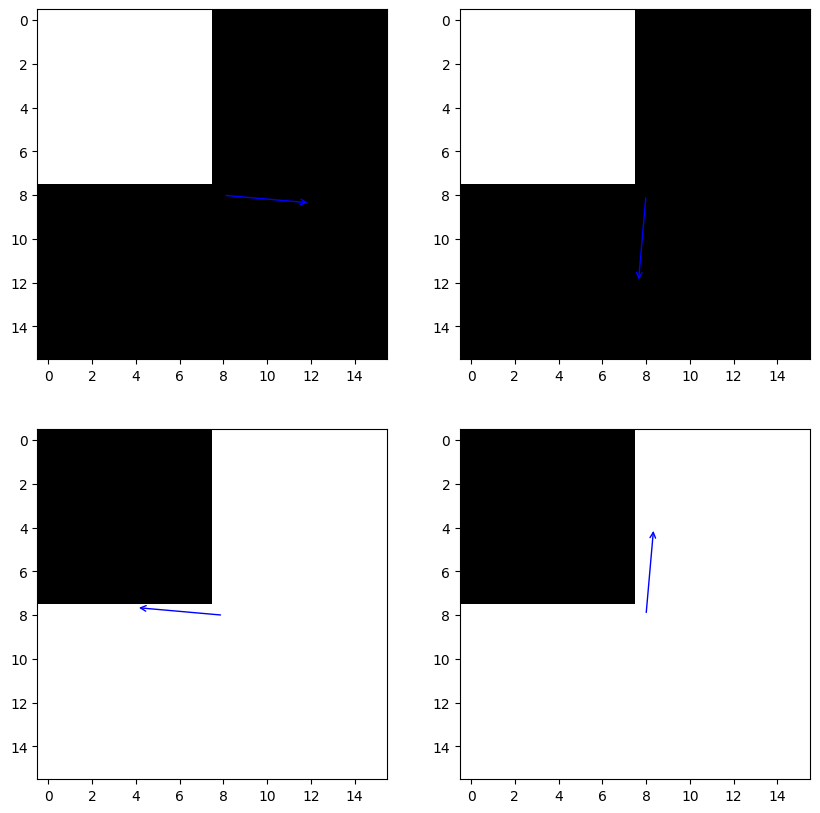

In [28]:
sample_patch_edge_kp_angles = shi_tomasi_sift._get_angles_from_histogram(sample_patch_edge_hist, sample_patch_edge_bins)
inverse_sample_patch_edge_kp_angles = shi_tomasi_sift._get_angles_from_histogram(inverse_sample_patch_edge_hist, inverse_sample_patch_edge_bins)

fig, ax = plt.subplots(2,2, figsize = (10, 10))

sts.plot_area_and_arrow_with_angle(ax[0][0], sample_patch_edge, sample_patch_edge_kp_angles[0], (100, 100), 16)
sts.plot_area_and_arrow_with_angle(ax[0][1], sample_patch_edge, sample_patch_edge_kp_angles[1], (100, 100), 16)
sts.plot_area_and_arrow_with_angle(ax[1][0], inverse_sample_patch_edge, inverse_sample_patch_edge_kp_angles[0], (100, 100), 16)
sts.plot_area_and_arrow_with_angle(ax[1][1], inverse_sample_patch_edge, inverse_sample_patch_edge_kp_angles[1], (100, 100), 16)


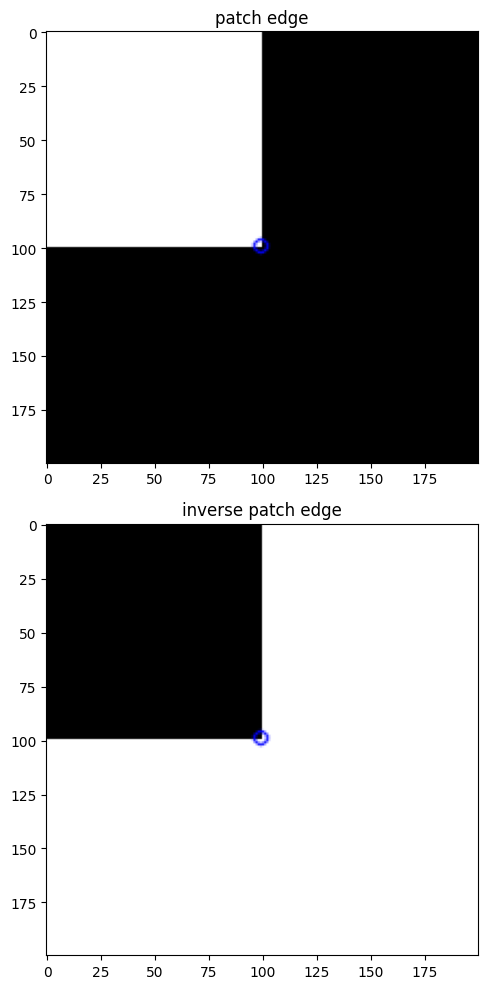

In [29]:
sample_patch_edge_kps, inverse_sample_patch_edge_kps = shi_tomasi_sift.detect(sample_patch_edge), shi_tomasi_sift.detect(inverse_sample_patch_edge)

sample_patch_edge_plot_image = sample_patch_edge.astype(np.uint8)
inverse_sample_patch_edge_plot_image = inverse_sample_patch_edge.astype(np.uint8)

patch_edge_kps_image = cv2.drawKeypoints(sample_patch_edge_plot_image, sample_patch_edge_kps, 0, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
inverse_patch_edge_kps_image = cv2.drawKeypoints(inverse_sample_patch_edge_plot_image, inverse_sample_patch_edge_kps, 0, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(2,1, figsize = (10, 10))
sts.plot_image(ax[0], patch_edge_kps_image, plot_title="patch edge")
sts.plot_image(ax[1], inverse_patch_edge_kps_image, plot_title="inverse patch edge")

plt.tight_layout()

Number of descriptors in our sample patch edge descs : 2
Number of descriptors in OpenCV sample patch edge descs : 1
Number of descriptors in our inverse sample patch edge descs : 2
Number of descriptors in OpenCV inverse sample patch edge descs : 1


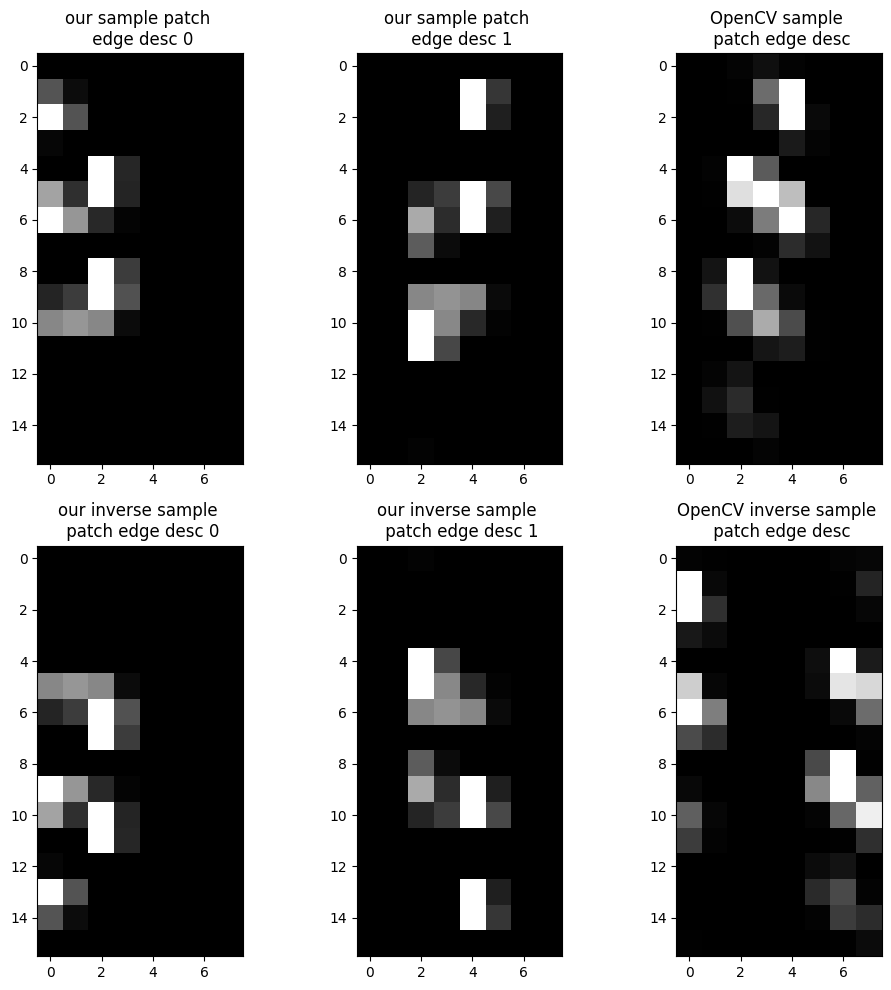

In [30]:
OpenCV_SIFT = cv2.SIFT_create()

_, our_sample_patch_edge_descs = shi_tomasi_sift.compute(sample_patch_edge, sample_patch_edge_kps)
_, OpenCV_sample_patch_edge_descs = OpenCV_SIFT.compute(patch_edge_kps_image, sample_patch_edge_kps)
_, our_inverse_sample_patch_edge_descs = shi_tomasi_sift.compute(inverse_sample_patch_edge, inverse_sample_patch_edge_kps)
_, OpenCV_inverse_sample_patch_edge_descs = OpenCV_SIFT.compute(inverse_patch_edge_kps_image, inverse_sample_patch_edge_kps)

print(f"Number of descriptors in our sample patch edge descs : {len(our_sample_patch_edge_descs)}")
print(f"Number of descriptors in OpenCV sample patch edge descs : {len(OpenCV_sample_patch_edge_descs)}")
print(f"Number of descriptors in our inverse sample patch edge descs : {len(our_inverse_sample_patch_edge_descs)}")
print(f"Number of descriptors in OpenCV inverse sample patch edge descs : {len(OpenCV_inverse_sample_patch_edge_descs)}")

our_sample_patch_edge_desc_0 = our_sample_patch_edge_descs[0]
our_sample_patch_edge_desc_1 = our_sample_patch_edge_descs[1]
OpenCV_sample_patch_edge_desc = OpenCV_sample_patch_edge_descs[0]
our_inverse_sample_patch_edge_desc_0 = our_inverse_sample_patch_edge_descs[0]
our_inverse_sample_patch_edge_desc_1 = our_inverse_sample_patch_edge_descs[1]
OpenCV_inverse_sample_patch_edge_desc = OpenCV_inverse_sample_patch_edge_descs[0]

our_sample_patch_edge_desc_0 = np.reshape(our_sample_patch_edge_desc_0, (16, 8))
our_sample_patch_edge_desc_1 = np.reshape(our_sample_patch_edge_desc_1, (16, 8))
OpenCV_sample_patch_edge_desc = np.reshape(OpenCV_sample_patch_edge_desc, (16, 8))
our_inverse_sample_patch_edge_desc_0 = np.reshape(our_inverse_sample_patch_edge_desc_0, (16, 8))
our_inverse_sample_patch_edge_desc_1 = np.reshape(our_inverse_sample_patch_edge_desc_1, (16, 8))
OpenCV_inverse_sample_patch_edge_desc = np.reshape(OpenCV_inverse_sample_patch_edge_desc, (16, 8))

fig, ax = plt.subplots(2, 3, figsize = (10, 10))
sts.plot_image(ax[0][0], our_sample_patch_edge_desc_0, plot_title= "our sample patch \n edge desc 0")
sts.plot_image(ax[0][1], our_sample_patch_edge_desc_1, plot_title= "our sample patch \n edge desc 1")
sts.plot_image(ax[0][2], OpenCV_sample_patch_edge_desc, plot_title= "OpenCV sample \n patch edge desc")
sts.plot_image(ax[1][0], our_inverse_sample_patch_edge_desc_0, plot_title= "our inverse sample \n patch edge desc 0")
sts.plot_image(ax[1][1], our_inverse_sample_patch_edge_desc_1, plot_title= "our inverse sample \n patch edge desc 1")
sts.plot_image(ax[1][2], OpenCV_inverse_sample_patch_edge_desc, plot_title= "OpenCV inverse sample \n patch edge desc")

plt.tight_layout()

Number of descriptors in our sample patch edge descs : 1
Number of descriptors in OpenCV sample patch edge descs : 1
Number of descriptors in our inverse sample patch edge descs : 1
Number of descriptors in OpenCV inverse sample patch edge descs : 1


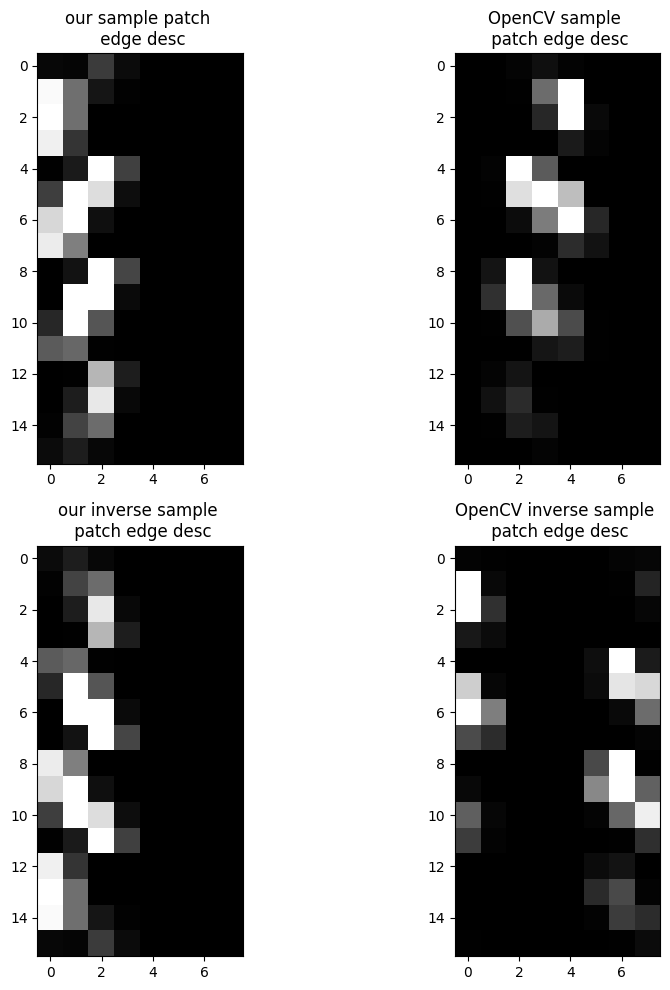

In [31]:
OpenCV_SIFT = cv2.SIFT_create()

blur = 10

sample_patch_edge_blurred = cv2.blur(sample_patch_edge, ksize = (blur, blur))
inverse_sample_patch_edge_blurred = cv2.blur(inverse_sample_patch_edge, ksize = (blur, blur))


_, our_sample_patch_edge_descs = shi_tomasi_sift.compute(sample_patch_edge_blurred, sample_patch_edge_kps)
_, OpenCV_sample_patch_edge_descs = OpenCV_SIFT.compute(patch_edge_kps_image, sample_patch_edge_kps)
_, our_inverse_sample_patch_edge_descs = shi_tomasi_sift.compute(inverse_sample_patch_edge_blurred, inverse_sample_patch_edge_kps)
_, OpenCV_inverse_sample_patch_edge_descs = OpenCV_SIFT.compute(inverse_patch_edge_kps_image, inverse_sample_patch_edge_kps)

print(f"Number of descriptors in our sample patch edge descs : {len(our_sample_patch_edge_descs)}")
print(f"Number of descriptors in OpenCV sample patch edge descs : {len(OpenCV_sample_patch_edge_descs)}")
print(f"Number of descriptors in our inverse sample patch edge descs : {len(our_inverse_sample_patch_edge_descs)}")
print(f"Number of descriptors in OpenCV inverse sample patch edge descs : {len(OpenCV_inverse_sample_patch_edge_descs)}")

our_sample_patch_edge_desc = our_sample_patch_edge_descs[0]
OpenCV_sample_patch_edge_desc = OpenCV_sample_patch_edge_descs[0]
our_inverse_sample_patch_edge_desc = our_inverse_sample_patch_edge_descs[0]
OpenCV_inverse_sample_patch_edge_desc = OpenCV_inverse_sample_patch_edge_descs[0]

our_sample_patch_edge_desc = np.reshape(our_sample_patch_edge_desc, (16, 8))
OpenCV_sample_patch_edge_desc = np.reshape(OpenCV_sample_patch_edge_desc, (16, 8))
our_inverse_sample_patch_edge_desc = np.reshape(our_inverse_sample_patch_edge_desc, (16, 8))
OpenCV_inverse_sample_patch_edge_desc = np.reshape(OpenCV_inverse_sample_patch_edge_desc, (16, 8))

# OpenCV_sample_patch_edge_desc = np.flip(OpenCV_sample_patch_edge_desc, axis = 0)
# OpenCV_inverse_sample_patch_edge_desc = np.flip(OpenCV_inverse_sample_patch_edge_desc, axis = 0)

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sts.plot_image(ax[0][0], our_sample_patch_edge_desc, plot_title= "our sample patch \n edge desc")
sts.plot_image(ax[0][1], OpenCV_sample_patch_edge_desc, plot_title= "OpenCV sample \n patch edge desc")
sts.plot_image(ax[1][0], our_inverse_sample_patch_edge_desc, plot_title= "our inverse sample \n patch edge desc")
sts.plot_image(ax[1][1], OpenCV_inverse_sample_patch_edge_desc, plot_title= "OpenCV inverse sample \n patch edge desc")

plt.tight_layout()

In [32]:

# _, our_descs = shi_tomasi_sift.compute(img, our_kps)
# _, OpenCV_descs = OpenCV_SIFT.compute(img, our_kps)

# our_desc = our_descs[0]
# our_desc = np.reshape(our_desc, (16, 8))
# OpenCV_desc = OpenCV_descs[0]
# OpenCV_desc = np.reshape(OpenCV_desc, (16, 8))

# fig, ax = plt.subplots(2, 1, figsize = (15, 15))
# sts.plot_image(ax[0], our_desc, plot_title="our")
# sts.plot_image(ax[1], OpenCV_desc, plot_title="opencv")